In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/df-stratified2/df_stratified2.csv
/kaggle/input/df-stratified/df_stratified.csv


In [2]:
# Import dependencies 
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [3]:
df_stratified2 = pd.read_csv("../input/df-stratified2/df_stratified2.csv")
df_stratified2

,beer_id,beer_name,brewery_id,state_beer,country_beer,style,availability,abv,brewery_name,city,types,look,smell,taste,feel,overall,score
0,1237,Pyramid Hefeweizen,403.0,WA,US,German Hefeweizen,Year round,5.2,"Pyramid Breweries, Inc.",Seattle,Brewery,3.25,3.00,3.00,3.00,3.00,3.02
1,24436,Helio Hefeweizen,7122.0,MT,US,German Hefeweizen,Year round,6.0,Red Lodge Ales,Red Lodge,"Brewery, Bar, Eatery, Beer-to-go",3.75,3.75,3.75,3.75,3.75,3.75
2,4011,Weizen,452.0,NC,US,German Hefeweizen,Year round,4.9,Weeping Radish Bavarian Restaurant,Manteo,"Bar, Eatery",3.50,3.00,4.00,3.50,4.00,3.68
3,2249,Hefeweizen,68.0,MD,US,German Hefeweizen,Year round,4.7,Flying Dog Brewery,Frederick,"Brewery, Bar, Eatery, Beer-to-go",3.50,3.50,3.00,3.50,4.00,3.40
4,4071,Snoweizen,1528.0,CA,US,German Hefeweizen,Year round,5.1,Snowshoe Brewing Company,Arnold,"Brewery, Bar, Eatery",2.50,4.00,3.00,2.50,3.00,3.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,140014,Hipster Brunch Stout,22564.0,MI,US,Stout,Fall,11.0,Odd Side Ales,Grand Haven,"Brewery, Bar, Eatery, Beer-to-go",4.50,4.50,4.25,4.00,4.25,4.30
39996,54320,Steam Fired Stout,21554.0,OR,US,Stout,Year round,7.6,Fire Mountain Brew House,Carlton,"Brewery, Beer-to-go",4.00,4.00,4.00,4.00,4.00,4.00
39997,1879,Samuel Adams Cream Stout,35.0,MA,US,Stout,Year round,4.9,Boston Beer Company (Samuel Adams),Jamaica Plain,"Brewery, Beer-to-go",4.00,4.00,4.00,4.00,4.00,4.00
39998,101578,Coffee Abraxas,25888.0,MO,US,Stout,Rotating,10.0,Perennial Artisan Ales,Saint Louis,"Brewery, Bar, Eatery, Beer-to-go",4.75,4.50,4.50,4.25,4.50,4.49


In [4]:
#Encode string values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_df_sample = df_stratified2.copy()
#encoded_df2['style'] = le.fit_transform(df_stratified['style'])
encoded_df_sample["state_beer"] = le.fit_transform(encoded_df_sample["state_beer"])
encoded_df_sample["availability"] = le.fit_transform(encoded_df_sample["availability"])
encoded_df_sample["types"] = le.fit_transform(encoded_df_sample["types"])
encoded_df_sample["style"] = le.fit_transform(encoded_df_sample["style"])
encoded_df_sample = encoded_df_sample.drop(['beer_name', 'country_beer','brewery_name','city','brewery_id','beer_id','smell','look','feel','score','overall'], axis=1)
encoded_df_sample

,state_beer,style,availability,abv,types,taste
0,47,18,6,5.2,1,3.00
1,26,18,6,6.0,5,3.75
2,27,18,6,4.9,0,4.00
3,20,18,6,4.7,5,3.00
4,4,18,6,5.1,4,3.00
...,...,...,...,...,...,...
39995,22,36,0,11.0,5,4.25
39996,37,36,6,7.6,10,4.00
39997,19,36,6,4.9,10,4.00
39998,24,36,2,10.0,5,4.50


In [5]:
#Create a seperate df for y
style_df = encoded_df_sample.filter(['style'], axis=1)
style_df

,style
0,18
1,18
2,18
3,18
4,18
...,...
39995,36
39996,36
39997,36
39998,36


In [6]:
#Create a seperate df for y
style_df = encoded_df_sample.filter(['style'], axis=1)
style_df

,style
0,18
1,18
2,18
3,18
4,18
...,...
39995,36
39996,36
39997,36
39998,36


In [7]:
encoded_df_sample = encoded_df_sample.drop(['style'], axis=1)
encoded_df_sample

,state_beer,availability,abv,types,taste
0,47,6,5.2,1,3.00
1,26,6,6.0,5,3.75
2,27,6,4.9,0,4.00
3,20,6,4.7,5,3.00
4,4,6,5.1,4,3.00
...,...,...,...,...,...
39995,22,0,11.0,5,4.25
39996,37,6,7.6,10,4.00
39997,19,6,4.9,10,4.00
39998,24,2,10.0,5,4.50


In [8]:
#Scale the data
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()

In [9]:
scaled_df = data_scaler.fit_transform(encoded_df_sample)
scaled_df

array([[ 1.64667307,  1.21991672, -0.72438472, -1.28423702, -1.32201723],
       [ 0.20767336,  1.21991672, -0.39671049,  0.52654001, -0.11761948],
       [ 0.27619715,  1.21991672, -0.84726256, -1.73693128,  0.28384644],
       ...,
       [-0.27199322,  1.21991672, -0.84726256,  2.7900113 ,  0.28384644],
       [ 0.07062576, -0.64484692,  1.24166069,  0.52654001,  1.08677828],
       [-0.6146122 , -0.64484692,  2.71619474, -0.37884851,  1.08677828]])

In [10]:
# Define features set
X = scaled_df.copy()
X

array([[ 1.64667307,  1.21991672, -0.72438472, -1.28423702, -1.32201723],
       [ 0.20767336,  1.21991672, -0.39671049,  0.52654001, -0.11761948],
       [ 0.27619715,  1.21991672, -0.84726256, -1.73693128,  0.28384644],
       ...,
       [-0.27199322,  1.21991672, -0.84726256,  2.7900113 ,  0.28384644],
       [ 0.07062576, -0.64484692,  1.24166069,  0.52654001,  1.08677828],
       [-0.6146122 , -0.64484692,  2.71619474, -0.37884851,  1.08677828]])

In [11]:
# Define target vector
y = style_df.values

In [12]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import StratifiedKFold

In [13]:
# split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [14]:
model = XGBClassifier()
n_estimators = range(0, 1000, 200)
    
param_grid = dict(n_estimators=n_estimators)
    
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [15]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)

In [16]:
print("Least lost: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
print()
for mean, stdev, param in zip(means, stds, params):
            print("%f (%f) with: %r" % (mean, stdev, param))

Least lost: -1.564088 using {'n_estimators': 200}

-3.688879 (0.000000) with: {'n_estimators': 0}
-1.564088 (0.032457) with: {'n_estimators': 200}
-1.700744 (0.042699) with: {'n_estimators': 400}
-1.833269 (0.049272) with: {'n_estimators': 600}
-1.938258 (0.052337) with: {'n_estimators': 800}


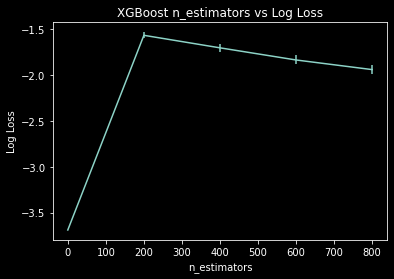

In [17]:
# plot
import matplotlib.pyplot as plt
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators.png')

